# AST326 lab01
### Maxwell Fine 1004714400

Ex 06: Calculation of the Hubble constant using the straight-line linear least squares fitting.
The file has two columns: the
first column is a list of the distances (in unit of mega-parsec [Mpc]) of 13 galaxies in the range
of 12000 Mpc; the second column gives the observed receding velocities of the galaxies in
unit of km s  1 . Using the data in the file, calculate the Hubble constant with its uncertainty by
applying the linear least squares fitting method. You need to use your own codes for this
assignment; in other words, you are NOT allowed to use a built-in Python library for the
fitting.

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np

# data fnames
hubble_f = 'data/Fine-finemaxw-Hubble.txt'

In [3]:
# load data for hubble constant
hubble_data = np.genfromtxt(fname=hubble_f)
distance = hubble_data[:,0] # in Mpc
rec_vel = hubble_data[:,1] # in kms^-1


In [4]:
# least squares fitting
def lin_least_squares(x_arr, y_arr):
    '''Performs a linear least squares fit to the data x_arr and y_arr. 
    Fits the line y = mx + c
    
    Args:
    x_arr: array-like
       the x array of data to be fit
    
    y_arr: array-like
           the y array of data to be fit
           
    Returns:
    
    m, c, std_m, std_c: tuple of floats
                        
    m: fitted slope
    
    c: fitted c
    
    std_m: error in m
    
    std_c: error in c
    '''

    # generate varables used to fit
    x_mean = np.mean(x_arr)
    y_mean = np.mean(y_arr)
    n = len(x_arr)
    
    # fitt m, and c
    m = np.sum((x_arr -x_mean)*(y_arr-y_mean)) / np.sum((x_arr-x_mean)**2)
    c = y_mean - m*x_mean
    
    # find std
    std_2 = (1/(n-2)) * np.sum((y_arr - (m*x_arr +c ))**2)
    # std in slope
    std_2_m = n * std_2 / (n*np.sum(x_arr**2) - np.sum(x_arr)**2)
    # std in c
    std_2_c = std_2*np.sum(x_arr**2) / (n*np.sum(x_arr**2) - np.sum(x_arr)**2)
    
    return m, c, np.sqrt(std_2_m), np.sqrt(std_2_c)
 
    

In [5]:
my_m, my_c, std_m, std_c = lin_least_squares(x_arr=distance, y_arr=rec_vel)
print(my_m, my_c, std_m, std_c)

60.24031927752311 996.3405501956004 0.8788832530527533 582.1769678161045


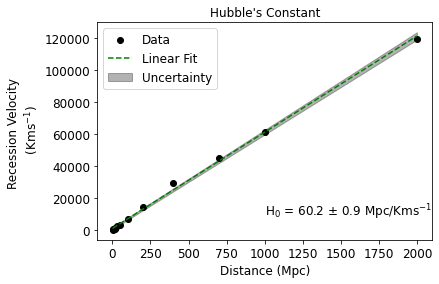

In [10]:
# plotting code
#plt.figure(figsize=(8, 6), dpi=80)
my_m, my_c, std_m, std_c = lin_least_squares(x_arr=distance, y_arr=rec_vel)
plt.scatter(distance, rec_vel, label="Data", color='k')
plt.plot(distance, my_m* distance + my_c, color='g',
         label='Linear Fit', linestyle='--')



# error 
# upper
plt.fill_between(distance,  (my_m+std_m)*distance +my_c + std_c, 
                 y2= (my_m-std_m)*distance +my_c - std_c, alpha=0.3, 
                     label='Uncertainty', color='k')

#lower

plt.legend(fontsize=12)
plt.figsize=((5,5))
plt.ylabel('Recession Velocity \n (Kms$^{-1}$)', fontsize=12)
plt.xlabel('Distance (Mpc)', fontsize=12)
plt.title('Hubble\'s Constant', fontsize =12)
plt.text(1000,9000, s='H$_0$ = ' 
         + str(my_m)[0:4] + ' $ \pm$ ' 
         + str(round(std_m,1)) + ' Mpc/Kms$^{-1}$',
        fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)




plt.savefig('figs/hubble.pdf',bbox_inches='tight')
plt.show()
plt.close()